# MACE method

In [216]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from numpy import cos, sin
from numpy import sqrt
import time



"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""

matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)


label_size = 20


In [217]:
import matplotlib.pyplot as plt
import numpy as np
#from google.colab import files

"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""

import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)

from numpy import cos, sin

label_size = 20

from numpy import sqrt

import time
from numba import jit
from numpy import sin, cos

T0=time.time()

import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)

In [218]:

import matplotlib.pyplot as plt
%matplotlib inline
from numpy import random, zeros, sqrt,cos,sin

import matplotlib.pyplot as plt
import numpy as np

from numba import jit
import numbers

from numpy import sqrt, zeros, diag, random, real, array, complex_, transpose, conjugate, exp, matmul, real


import matplotlib
import matplotlib.pyplot as plt
from scipy.linalg import norm
from numpy import dot

from numpy import pi as pi
from numpy import array

import scipy

from numpy import exp, imag, real,zeros, conj
from numpy import sum
from scipy import sparse
from numpy import array
import scipy.sparse as sp
from numpy import concatenate

from scipy.sparse import csr_matrix
from numpy import sqrt, dot
from numpy.random import choice
from numpy.random import normal
from numpy import sqrt


from numpy import add
from numpy import concatenate
from scipy.sparse import coo_matrix

from scipy.sparse import kron

In [219]:
#t0=time.time()

# Parameters

In [220]:
#Parameters  (Check the units)

Gamma_r=1    #  2*pi*6e6  #reference

wL=4.5*Gamma_r  #Laser frequency
w0=4.5*Gamma_r  #Energy difference, twith hbar=1
c_light=3e8     #m/s


DeltaL0=wL-w0      #wL − w0, where wL is the laser detuning   , What are the units?
Omega=4 *Gamma_r   #Gamma_r  #Driving frequency , What are the units?




N_atom=14          #Number of atoms
Atom_cutoff=6





lambda_r  =1    # in units

Lambda_las=1     # in units    Gamma_r*2*pi/(wL/c_light)   #Laser wavelenght  , What are the units?

e_L=array([0,1,0]/sqrt(1))


Theta1=pi/2
Theta2=pi/2   #they got [0,1,0]

e_0=array([sin(Theta1)*cos(Theta2),sin(Theta1)*sin(Theta2),cos(Theta1)])

K_laser=(2*pi/Lambda_las)*array([1,0,0])

k0=2*pi/Lambda_las

Gamma_dec=Gamma_r

# Clebsch-Gordan coefficient

In [221]:
# Clebsch-Gordan coefficient

C00=1    #will change due to the transition nature


# Positions

In [222]:
# Positions


## Oblate Variances matrix: Set the shape of the atoms cloud

Sigma_x=20 *lambda_r    
Sigma_y=0.25*lambda_r    
Sigma_z=Sigma_y        


Oblate_variances=zeros((3,3))

Oblate_variances[0][0]=Sigma_x
Oblate_variances[1][1]=Sigma_y
Oblate_variances[2][2]=Sigma_z

Miu_pos=[0 , 0, 0]

Pos_atoms=(random.multivariate_normal(Miu_pos, Oblate_variances, N_atom))


Pos_atoms

array([[-1.69161704, -0.44188433, -0.70350891],
       [-0.66652224,  0.15841857, -0.29050425],
       [ 2.75260658, -0.10102683,  0.02651603],
       [-0.9926741 , -0.60465391,  0.15543585],
       [-3.6309398 , -0.432253  ,  0.51669391],
       [-0.56927433,  0.30909772, -0.05366525],
       [ 3.42319403,  0.24590286, -0.75019637],
       [ 7.78655657, -0.63644295, -0.161667  ],
       [-9.66551123,  0.24221771, -0.46625387],
       [ 2.69641556,  0.23139258, -0.21605581],
       [-2.86472359,  0.17998557, -0.40565044],
       [ 4.72124779,  0.62713624,  0.38580061],
       [10.27606847,  0.16794696, -0.46045232],
       [-3.77790431,  0.7064187 ,  0.02480581]])

In [180]:


for j in range(N_atom):
    Pos_atoms[j]=np.array([0.17*Lambda_las*j,0,0])
    

#Pos_atoms
Pos_atoms    

array([[0.  , 0.  , 0.  ],
       [0.17, 0.  , 0.  ],
       [0.34, 0.  , 0.  ],
       [0.51, 0.  , 0.  ],
       [0.68, 0.  , 0.  ],
       [0.85, 0.  , 0.  ],
       [1.02, 0.  , 0.  ],
       [1.19, 0.  , 0.  ],
       [1.36, 0.  , 0.  ],
       [1.53, 0.  , 0.  ],
       [1.7 , 0.  , 0.  ],
       [1.87, 0.  , 0.  ],
       [2.04, 0.  , 0.  ],
       [2.21, 0.  , 0.  ]])

# Construct $I_{Lk}$ and $R_{Lk}$

In [223]:
# Construct I_Lk and R_Lk

eL_e0c=dot(e_L,conj(e_0))

conj_0=conj(e_0)

DotKL_rk=[]   #summarize k_L.r_k for all k

for j in range(N_atom):
    DotKL_rk.append(dot(Pos_atoms[j],K_laser))

DotKL_rk_exp=exp(1j*array(DotKL_rk))


ZL_k= DotKL_rk_exp*eL_e0c


ImL_k=imag(ZL_k)
RmL_k=real(ZL_k)

 

# Construct $G_{ij}$

In [224]:
# Construct the matrix R00
#t0=time.time()

#@jit
def fun_Pkl0(k,l,k0=k0):
    
    VecR_kl=Pos_atoms[k]-Pos_atoms[l]
    R_kl=sqrt(dot(VecR_kl,VecR_kl))
    #R_kl=norm(VecR_kl)
    
    
    #Pkl0=dot(conj(e_0),VecR_kl)
    Pkl0=dot(conj_0,VecR_kl)/R_kl
    Pkl_0nC=(abs(Pkl0))**2
    
    M0kl=k0*R_kl
    
    return (1-Pkl_0nC)/M0kl+(1-3*Pkl_0nC)*(1j/(M0kl)**2-1/(M0kl)**3)
    


MatL=zeros((N_atom,N_atom),dtype='complex')
MatR=zeros((N_atom,N_atom),dtype='complex')


for i in range(N_atom):
    for j in range(i+1,N_atom):
        
        MatL[i][j]=exp(1j*k0*norm(Pos_atoms[i] -Pos_atoms[j]))
        MatR[i][j]=fun_Pkl0(i,j,k0)

                
MatR=MatR+MatR.T
MatL=MatL+(MatL.T)


Gij=(3*Gamma_dec/4)*MatL*MatR


#t1=time.time()

Gij=Gij + 1j*0.5*Gamma_r*np.identity(N_atom) 

Abs_Gij=abs(Gij)

import numpy as np

def index_Gij(arr,Atom_cutoff):
    
    Ordered_N = list(np.argsort(arr)[::-1][:Atom_cutoff])
    
    return Ordered_N


Index_N=[]


for j in range(Abs_Gij.shape[0]):
    
    test_list = list(Abs_Gij[j])
    
    Index_N.append( [j]+list(index_Gij(test_list,Atom_cutoff-1))  )
    
    
   


In [225]:
(scipy.linalg.eig(imag(Gij))[0]).round(6)

array([0.826858+0.j, 0.236821+0.j, 0.712424+0.j, 0.301444+0.j,
       0.387087+0.j, 0.413936+0.j, 0.582245+0.j, 0.572275+0.j,
       0.438874+0.j, 0.534925+0.j, 0.525876+0.j, 0.516404+0.j,
       0.48404 +0.j, 0.46679 +0.j])

In [226]:
#Gij.round(3)

In [227]:
Sigma_eg=csr_matrix(np.array([[0,1],
                              [0,0]]))
Id_2LS  =csr_matrix(np.array([[1,0],
                              [0,1]]))

Zero_2LS=csr_matrix(np.array([[0,0],
                              [0,0]]))

state   =csr_matrix(np.array([[0,0],
                              [0,1]]))


Sigma_ee=csr_matrix(np.array([[1,0],
                              [0,0]]))

Sigma_egT=Sigma_eg.T

In [228]:

def tensor_id(ArrayL ):
    
    Tensor_id=kron(ArrayL[0],ArrayL[1])
    
    Array_id=Atom_cutoff*[Id_2LS]    
    
    for j in range(2,len(ArrayL)):
        
        Tensor_id=kron(Tensor_id,Array_id[j])
        
    
    return coo_matrix(Tensor_id.todense())



In [229]:
def tensor_kj( k , j):   #tensor among k,j are Positions in the cluster after the G classification
                         #k is +sigma and j is -sigma 
    Array_id=Atom_cutoff*[Id_2LS]  
    
    Array_id[k]=Sigma_eg
    Array_id[j]=Sigma_egT
    
    Tensor_kj=kron(Array_id[0],Array_id[1])
    
    for j in range(2,len(Array_id)):
        
        Tensor_kj=kron(Tensor_kj,Array_id[j])
        
    
    return coo_matrix(Tensor_kj.todense())



In [230]:
def tensor_k_ee( k  ):  #Excited state k is a Position in the cluster after the G classification
    
    Array_id=Atom_cutoff*[Id_2LS]  
    
    Array_id[k]=Sigma_ee
    
    Tensor_k    =kron(Array_id[0],Array_id[1])
    
    for j in range(2,len(Array_id)):
        
        Tensor_k=kron(Tensor_k,Array_id[j])
        
    
    return coo_matrix(Tensor_k.todense())

In [231]:
def tensor_k( k  ):  #sigmaplus k
    
    Array_id=Atom_cutoff*[Id_2LS]  
    
    Array_id[k]=Sigma_eg
    
    Tensor_k    =kron(Array_id[0],Array_id[1])
    
    for j in range(2,len(Array_id)):
        
        Tensor_k=kron(Tensor_k,Array_id[j])
        
    
    return coo_matrix(Tensor_k)

In [232]:
def init_rho(Atom_cutoff=Atom_cutoff,state=state):
    
    state_fact=Atom_cutoff*[state]
    
    Rho_in=kron(state_fact[0],state_fact[1])
    
    for j in range(2,Atom_cutoff):
        
        
        Rho_in=kron(Rho_in,state_fact[j])
        
    return coo_matrix(Rho_in)

In [233]:
Idu=tensor_id( Atom_cutoff*[Id_2LS])

In [234]:
real(Gij)

array([[ 0.        , -0.0073085 , -0.02600583,  0.06526278, -0.01679359,
        -0.05944289,  0.01146128, -0.01256288,  0.01476838, -0.02568537,
        -0.04713992, -0.01453984,  0.00990315, -0.03766766],
       [-0.0073085 ,  0.        , -0.03280203,  0.03661805,  0.02410494,
        -0.12631369,  0.02079222, -0.01392276,  0.01325408, -0.02458386,
         0.01250356, -0.02086031,  0.0102894 ,  0.01499822],
       [-0.02600583, -0.03280203,  0.        ,  0.00726137, -0.01596871,
        -0.02157052,  0.07866117,  0.02102612, -0.00879591, -0.0710509 ,
        -0.01288983,  0.03187665, -0.01510492, -0.01543276],
       [ 0.06526278,  0.03661805,  0.00726137,  0.        , -0.01946352,
         0.03219121, -0.02099229,  0.00320432, -0.00092782,  0.01043708,
         0.0366965 ,  0.01181709, -0.00412196,  0.02720347],
       [-0.01679359,  0.02410494, -0.01596871, -0.01946352,  0.        ,
         0.00911034,  0.00483454, -0.00973749,  0.01075174, -0.01543779,
        -0.04302279, -0.01

In [235]:
ReG=real(Gij)
ImG=imag(Gij)

In [236]:
ImG[0,0]

0.5

In [237]:
@jit
def Part_H_L_R_LR(index_center):
    
    Array_id=Atom_cutoff*[Id_2LS] 
    Index_list=Index_N[index_center]
    Zero_gen=tensor_id(Atom_cutoff*[ Zero_2LS ])
    
    Z1=Zero_gen
    Z2=Zero_gen
    Z3=kron(Zero_gen,Zero_gen)
    
    Identity=tensor_id( Atom_cutoff*[Id_2LS])
    
    
    D_R = Zero_gen
    D_L = Zero_gen
    D_RL= kron(Zero_gen,Zero_gen)
    
    
    for k in range(Atom_cutoff):
        
        IL_k = Index_list[k]

        zL_k = ZL_k[IL_k]

        Ten_k= tensor_k(k)
        
        Ten_k_ee=tensor_k_ee(k)
        
        Z2   = Z2+ 1j*(Omega)*(zL_k*Ten_k  +conj(zL_k)*(Ten_k.T) )
        
        
        D_R   = D_R  - ( ImG[k,k]     )*Ten_k_ee
        D_L   = D_L  - ( ImG[k,k]     )*Ten_k_ee
        D_RL  = D_RL + ( 2 * ImG[k,k] )*kron( Ten_k.T , Ten_k.T  )
        
        
        for j in range(k+1,Atom_cutoff):
            
            IL_j  =Index_list[j]

            Ten_kj= tensor_kj( k , j )
            
            ReGkj=ReG[IL_k,IL_j]
            ImGkj=ImG[IL_k,IL_j]
            ReGjk=ReG[IL_j,IL_k]
            ImGjk=ImG[IL_j,IL_k]
            
            
            Z1=Z1+ (1j*ReGkj-ImGkj)*Ten_kj+(1j*ReGjk-ImGjk)*(Ten_kj.T)
            
            Ten_j=tensor_k(j)
            
            
            Tenk_Tenj=kron(Ten_k.T,Ten_j.T)

            Tenj_Tenk=kron(Ten_j.T,Ten_k.T)
            
            
            Z3=Z3+2*( ImGkj*Tenk_Tenj   +  ImGjk* Tenj_Tenk )
            
            
        
        
    L_R = Z2+Z1
    L_L =-(Z2.T)+conj(Z1.T) 
    L_RL=Z3
    
    
    #print(L_R.shape, L_L.shape, L_RL.shape)
    
    Vectorization=kron(Identity,  L_R+D_R )+kron(L_L+D_L,Identity )+L_RL+D_RL
    
    
    return Vectorization



In [238]:
Ivec=[4**Atom_cutoff-1]
Jvec=[0]
Vvec=[1]


Init_rho=(sparse.coo_matrix((Vvec,(Ivec,Jvec)),shape=(4**Atom_cutoff,1))) 


In [239]:
index_center=0


M_vect=Part_H_L_R_LR(index_center)

Part_H_L_R_LR(index_center)

<ipython-input-237-1c1c5033db20>:1: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "Part_H_L_R_LR" failed type inference due to: Untyped global name 'Id_2LS': cannot determine Numba type of <class 'scipy.sparse.csr.csr_matrix'>

File "<ipython-input-237-1c1c5033db20>", line 4:
def Part_H_L_R_LR(index_center):
    <source elided>
    
    Array_id=Atom_cutoff*[Id_2LS] 
    ^

  @jit
<ipython-input-237-1c1c5033db20>:1: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "Part_H_L_R_LR" failed type inference due to: Untyped global name 'Id_2LS': cannot determine Numba type of <class 'scipy.sparse.csr.csr_matrix'>

File "<ipython-input-237-1c1c5033db20>", line 4:
def Part_H_L_R_LR(index_center):
    <source elided>
    
    Array_id=Atom_cutoff*[Id_2LS] 
    ^

  @jit
/usr/local/lib/python3.7/dist-packages/numba/core/object_mode_passes.py:178: NumbaWarning: Function "Part_H_L_R_LR" was c

<4096x4096 sparse matrix of type '<class 'numpy.complex128'>'
	with 151551 stored elements in Compressed Sparse Row format>

In [240]:


@jit
def f(t, yR):
 
    
    MatA=M_vect@yR


    return MatA
    

In [241]:
import matplotlib.pyplot as plt
import numpy as np
#from google.colab import files

"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""

import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)

from numpy import cos, sin

label_size = 20

from numpy import sqrt

import time
from numba import jit
from numpy import sin, cos

T0=time.time()

import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)

In [242]:
tspan=np.linspace(0,10,400)

In [243]:
from scipy.integrate import solve_ivp

In [244]:
tyme0=time.time()

sol = solve_ivp(f, [tspan[0], tspan[-1]], list(array((Init_rho.todense()).T,dtype="complex")[0]),dense_output=True )

tyme1=time.time()


print(tyme1-tyme0)

<ipython-input-240-48ba88635647>:3: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "f" failed type inference due to: Untyped global name 'M_vect': cannot determine Numba type of <class 'scipy.sparse.csr.csr_matrix'>

File "<ipython-input-240-48ba88635647>", line 7:
def f(t, yR):
    <source elided>
    
    MatA=M_vect@yR
    ^

  @jit
/usr/local/lib/python3.7/dist-packages/numba/core/object_mode_passes.py:178: NumbaWarning: Function "f" was compiled in object mode without forceobj=True.

File "<ipython-input-240-48ba88635647>", line 4:
@jit
def f(t, yR):
^

  state.func_ir.loc))
/usr/local/lib/python3.7/dist-packages/numba/core/object_mode_passes.py:188: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compilation path has been detected, this is deprecated behaviour.

For more information visit https://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-object-mode-fal

1.3741846084594727


In [245]:
((sol.y)).shape[1]

185

In [246]:
((sol.y)[:,-1]).shape

(4096,)

In [247]:
Sol_dense=(sol.sol(tspan))

In [248]:
#Changeeee

In [249]:
Sigma_EG=array(tensor_k(0).todense())
Sigma_EE=array(tensor_k_ee(0).todense())

#S_eg=array(Sigma_eg.todense())
#S_ee=array(Sigma_ee.todense())

In [250]:
Sigma_eg

<2x2 sparse matrix of type '<class 'numpy.longlong'>'
	with 1 stored elements in Compressed Sparse Row format>

In [251]:
dot(Sigma_EE.flatten(),(sol.y)[:,0])

0j

In [252]:
Atom_cutoff

6

In [253]:
tensor_k(0)

<64x64 sparse matrix of type '<class 'numpy.longlong'>'
	with 1024 stored elements in COOrdinate format>

In [254]:
Splus_i=[]
See_i  =[]

Y_array=Sol_dense

for j in range((Y_array).shape[1]):
    
    See=dot(Sigma_EE.flatten(),(Y_array)[:,j])
    Seg=dot(Sigma_EG.flatten(),(Y_array)[:,j])
    
    
    See_i.append(See)
    
    Splus_i.append(Seg)
    
    


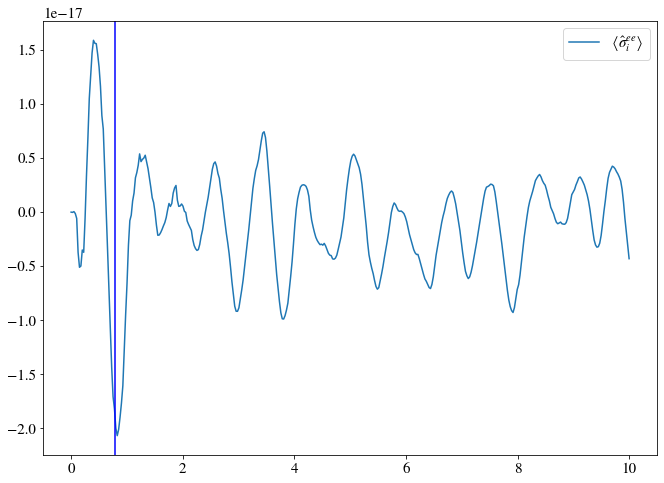

In [257]:

#plt.plot(tspan,2*np.real(Splus_i),label="$\\left<\hat{\sigma}_i^x\\right>$")

#plt.plot(tspan,2*np.imag(Splus_i),label="$\\left<\hat{\sigma}_i^y\\right>$")
#plt.plot(tspan,-sin(2*Omega*tspan),"--")

#plt.plot(tspan,(sin(Omega*tspan))**2,"-*")
plt.plot(tspan,np.imag(See_i),label="$\\left<\hat{\sigma}_i^{ee}\\right>$")

plt.axvline(x=np.pi/4, color='b')

#plt.xscale("log")

plt.legend()

In [256]:
here

NameError: ignored

In [ ]:
steps=3000
t_final=3


dt=t_final/steps

tspan=np.linspace(0,t_final,steps)

In [ ]:
dt

In [ ]:
@jit
def oper_h(rho,H_L,H_R):
        
    return H_L@rho + rho@H_R

In [ ]:
@jit
def matrix_evol(rho,index_center):
    
    s_iplus=[]
    s_iee  =[]
    
    rho_states=[]
    
    Index_list=Index_N[index_center]
    
    sigma_plus_ic=   tensor_k(0)
    sigma_ee_ic  =   tensor_k_ee(0)
    
    H_LR=Part_H_LR(index_center)
    
    H_L = H_LR[0]
    H_R = H_LR[1]
    
    rho_final=rho
    
    
    s_iplus.append( sum(( sigma_plus_ic@rho_final).diagonal())  )
    s_iee.append( sum(( sigma_ee_ic@rho_final ).diagonal())  )
    #rho_states.append(rho_init)
    

    for t in range(len(tspan)):
        
        print(t*100/len(tspan))
        
        
        rho_final  =rho_final+dt*(oper_h(rho_final,H_L,H_R))
        
        
#        for k in range(Atom_cutoff):
#            for j in range(k+1,Atom_cutoff):
                    
#                K_k=Index_list[k]
#                J_j=Index_list[j]
                
#                sig_p_k=tensor_k(k)
#                sig_p_j=tensor_k(j)
                
#                sig_p_k_T=sig_p_k.T
#                sig_p_j_T=sig_p_j.T                
                    
#                ImGkj       =ImG[K_k,J_j]
#                ImGjk       =ImG[J_j,K_k]
                    
                    
#                rho_final=rho_final+2*dt*(ImGkj*(sig_p_k_T@rho_final@sig_p_j)+ImGjk*(sig_p_j_T@rho_final@sig_p_k))
        
        
        s_iplus.append( sum(( sigma_plus_ic@rho_final ).diagonal())  )
        s_iee.append( sum(( sigma_ee_ic@rho_final).diagonal())  )
        #rho_states.append(rho_init)
               
    return s_iplus, s_iee   #,rho_states
         

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#from google.colab import files

"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""

import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)

from numpy import cos, sin

label_size = 20

from numpy import sqrt

import time
from numba import jit
from numpy import sin, cos

T0=time.time()

import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)

In [ ]:
T_init=time.time()


Evolution=matrix_evol(init_rho(),5)


T_final=time.time()

In [ ]:
print(T_final-T_init)

In [ ]:
print(N_atom,Atom_cutoff)

In [ ]:
(np.ones((steps,)))

In [ ]:
plt.plot(tspan,np.real(Evolution[1][:-1]))
#plt.plot(tspan,2*real(Evolution[0][:-1]))


plt.plot(tspan,2*imag(Evolution[0][:-1]))
plt.plot(tspan,2*real(Evolution[0][:-1]))
#plt.plot(tspan,(sin(Omega*tspan))**2,"--")

#plt.plot(tspan,-(sin(2*Omega*tspan)),"--")




plt.plot(tspan,(np.ones((steps,))))
plt.plot(tspan,-(np.ones((steps,))))

#plt.axvline(x=pi/4, color='b')

In [ ]:
herre

In [ ]:
plt.plot(tspan,np.real(Evolution[1][:-1]))
#plt.plot(tspan,2*real(Evolution[0][:-1]))


plt.plot(tspan,2*imag(Evolution[0][:-1]))
plt.plot(tspan,2*real(Evolution[0][:-1]))
#plt.plot(tspan,(sin(Omega*tspan))**2,"--")

#plt.plot(tspan,-(sin(2*Omega*tspan)),"--")




plt.plot(tspan,(np.ones((steps,))))
plt.plot(tspan,-(np.ones((steps,))))

#plt.axvline(x=pi/4, color='b')

\begin{align}
\partial_{t}\rho & =-{\rm i}\left[H,\rho\right]+\mathcal{L}\left[\rho\right],\\
\rho\left(t+\Delta t\right) & =\rho\left(t\right)+\Delta t\left(-{\rm i}\left[H,\rho\left(t\right)\right]+\mathcal{L}\left[\rho\left(t\right)\right]\right)
\end{align}


\begin{align*}
A_{k} & =C_{k}+D_{k},\\
C_{k}^{{\rm T}} & =-C_{k},\\
D_{k}^{xx} & =-\left(C_{0}^{0}\right)^{2}\Gamma\frac{\left(1+\left\langle \sigma_{z}^{k}\right\rangle \right)}{2},\\
D_{k}^{yy} & =-\left(C_{0}^{0}\right)^{2}\Gamma\frac{\left(1+\left\langle \sigma_{z}^{k}\right\rangle \right)}{2},\\
D_{k}^{zx} & =\left(C_{0}^{0}\right)^{2}\Gamma\frac{\left\langle \sigma_{x}^{k}\right\rangle }{2},\\
D_{k}^{zy} & =\left(C_{0}^{0}\right)^{2}\Gamma\frac{\left\langle \sigma_{y}^{k}\right\rangle }{2},\\
D_{k}^{zz} & =-\left(C_{0}^{0}\right)^{2}\Gamma,\\
C_{k}^{xy} & =-\Delta,\\
C_{k}^{xz} & =2C_{0}^{0}\Omega\mathcal{I}\left({\rm e}^{{\rm i}\overrightarrow{{\rm k}}_{{\rm L}}\cdot\overrightarrow{r}_{k}}\left(\hat{e}_{{\rm L}}\cdot\hat{e}_{+}^{*}\right)\right)-\left(C_{0}^{0}\right)^{4}\left(\overrightarrow{\mathcal{R}}_{0,0}^{k}\cdot\left\langle \overrightarrow{\sigma}_{y}\right\rangle \right)+\left(C_{0}^{0}\right)^{2}\Gamma\left\langle S^{x}\right\rangle ,\\
C_{k}^{yz} & =2C_{0}^{0}\Omega\mathcal{R}\left({\rm e}^{{\rm i}\overrightarrow{{\rm k}}_{{\rm L}}\cdot\overrightarrow{r}_{k}}\left(\hat{e}_{{\rm L}}\cdot\hat{e}_{+}^{*}\right)\right)+\left(C_{0}^{0}\right)^{4}\left(\overrightarrow{\mathcal{R}}_{0,0}^{k}\cdot\left\langle \overrightarrow{\sigma}_{x}\right\rangle \right)+\left(C_{0}^{0}\right)^{2}\Gamma\left\langle S^{y}\right\rangle .
\end{align*}


\begin{equation}
{\rm d}\left\langle \overrightarrow{s}_{k}\right\rangle =A_{k}\left\langle \overrightarrow{s}_{k}\right\rangle {\rm d}t-\left(C_{0}^{0}\right)^{2}\Gamma\begin{pmatrix}0\\
0\\
1
\end{pmatrix}{\rm d}t+C_{0}^{0}\sqrt{\Gamma}\begin{pmatrix}-\left\langle \sigma_{y}^{k}\right\rangle \\
\left\langle \sigma_{x}^{k}\right\rangle \\
1+\left\langle \sigma_{z}^{k}\right\rangle 
\end{pmatrix}{\rm d}W
\end{equation}

# Construct matrix $A_k$

In [ ]:
@jit
def Matrix_A(VectSx,VectSy,VectSz,C00=C00,Omega=Omega,Gamma_dec=Gamma_dec,N_atom=N_atom):
    
    """
    Pk: Index of the kth atom
    VectSy: \overrightarrow{\sigma_y}
    VectSx: \overrightarrow{\sigma_X}
    """
    Pk=0
    R00_k=R00[Pk]
    
    C0_Cuad_Gam=(C00**2)*Gamma_dec
    C0_Omega_Tw=2*C00*Omega
    C0_pow4=C00**4
    
    
    Cxz_k=C0_Omega_Tw*ImL_k[Pk]-(C0_pow4)*dot(R00_k,VectSy)+C0_Cuad_Gam*sum(VectSx)/2
    Cyz_k=C0_Omega_Tw*RmL_k[Pk]+(C0_pow4)*dot(R00_k,VectSx)+C0_Cuad_Gam*sum(VectSy)/2
    
     
    sxk=VectSx[Pk]
    syk=VectSy[Pk]
    szk=VectSz[Pk]
    
    
    Dxx_k=-C0_Cuad_Gam*(1+szk)/2
    Dyy_k= Dxx_k                     #-(C00**2)*Gamma_dec*refz
    Dzx_k= C0_Cuad_Gam*sxk/2
    Dzy_k= C0_Cuad_Gam*syk/2
    Dzz_k=-C0_Cuad_Gam
    
    
    Ic = array([0,1])
    Jc = array([2,2])
    Vc = array([Cxz_k,Cyz_k])
    
    
    #Gen_k = sparse.coo_matrix((V,(I,J)),shape=(3*N_atom,3*N_atom))
    #C_k   = Gen_k - Gen_k.T
    
    
    Id = array([0,1,2,2,2])
    Jd = array([0,1,0,1,2])
    Vd = array([Dxx_k,Dyy_k,Dzx_k,Dzy_k,Dzz_k])
    
    
    
    for Pk in range(1,N_atom):
        
        
        R00_k=R00[Pk]
    
    
        Cxz_k=C0_Omega_Tw*ImL_k[Pk]-(C0_pow4)*dot(R00_k,VectSy)+C0_Cuad_Gam*sum(VectSx)/2
        Cyz_k=C0_Omega_Tw*RmL_k[Pk]+(C0_pow4)*dot(R00_k,VectSx)+C0_Cuad_Gam*sum(VectSy)/2
    
     
        sxk=VectSx[Pk]
        syk=VectSy[Pk]
        szk=VectSz[Pk]
    
    
        Dxx_k=-C0_Cuad_Gam*(1+szk)/2
        Dyy_k= Dxx_k                     #-(C00**2)*Gamma_dec*refz
        Dzx_k= C0_Cuad_Gam*sxk/2
        Dzy_k= C0_Cuad_Gam*syk/2
        Dzz_k=-C0_Cuad_Gam
        
        
        
        
        Transl_i=3*Pk
    
        Ic = concatenate((Ic, array([0,1])+Transl_i  ))
        Jc = concatenate((Jc, array([2,2])+Transl_i  ))
        Vc = concatenate((Vc, array([Cxz_k,Cyz_k])   ))
    
    
    
        Id = concatenate((Id, array([0,1,2,2,2])+Transl_i  ))
        Jd = concatenate((Jd, array([0,1,0,1,2])+Transl_i  ))
        Vd = concatenate((Vd, array([Dxx_k,Dyy_k,Dzx_k,Dzy_k,Dzz_k]) ))    


    
    SizeA=3*N_atom
    
    G = coo_matrix((Vc,(Ic,Jc)),shape=(SizeA,SizeA))
    
    D = coo_matrix((Vd,(Id,Jd)),shape=(SizeA,SizeA))
    
    
    
    
    
    return G-G.T  +  D    #Here I changed the .to..dense()


In [ ]:
def MatrixRot_k(Pk,K_laser=K_laser,Alpha=0):
    
    Rk=Pos_atoms[Pk]
    
    Phi_k=dot(K_laser,Rk)
    
    S_k=sin(Phi_k)
    C_k=cos(Phi_k)
    S_a=sin(2*Alpha)
    C_a=cos(2*Alpha)
    
    Array_Rot_k=np.array([[-C_k*C_a, S_k*C_a,-S_a],
                        [S_k,C_k,0],
                        [C_k*S_a,-S_k*S_a,-C_a]])
    
    return Array_Rot_k.round(6)

In [ ]:
def gRot_gen():
    Array_Rot_gen=np.array([[0,-1,0],
                           [1,0,0],
                           [0,0,1]])
    
    return Array_Rot_gen

    

In [ ]:
# Matrix R of general rotation

#tu0=time.time()

round_val=8
k=0
M_k=csr_matrix(MatrixRot_k(0).round(round_val))

Coord=(M_k).nonzero()

Xk=Coord[0]
Yk=Coord[1]
Valk=(M_k).data

X_arr=Xk
Y_arr=Yk
Val_arr=Valk


for k in range(1,N_atom):
    M_k=csr_matrix(MatrixRot_k(k).round(round_val))
    Coord=(M_k).nonzero()
    
    Xk=Coord[0]+3*k
    Yk=Coord[1]+3*k
    Valk=(M_k).data
    
    X_arr=np.concatenate((X_arr, Xk), axis=0)
    Y_arr=np.concatenate((Y_arr, Yk), axis=0)
    Val_arr=np.concatenate((Val_arr, Valk), axis=0)
    
    
Rot_R = (sparse.coo_matrix((Val_arr,(X_arr,Y_arr)),shape=(3*N_atom,3*N_atom))) 

#tu1=time.time()

#print(tu1-tu0)

In [ ]:
Val_arr=np.array(N_atom*[-1,1,1])

Ib=[]
Jb=[]

for j in range(N_atom):
    
    Ij=np.array([0+3*j,1+3*j,2+3*j])
    Jj=np.array([1+3*j,0+3*j,2+3*j])
    
    Ib= np.concatenate((Ib, Ij))
    Jb= np.concatenate((Jb, Jj))


In [ ]:
Rot_Val = (sparse.coo_matrix((array(Val_arr),(Ib,Jb)),shape=(3*N_atom,3*N_atom)))

In [ ]:
#print(Rot_R)

In [ ]:
sqr_GammaR=sqrt(Gamma_dec)

In [ ]:
#Plot the matrix R


#import numpy as np
#import matplotlib.pyplot as plt

#plt.imshow(Rot_R.todense())
#plt.colorbar()
#plt.show()

In [ ]:
#More efficient multiplication


#tyu0=time.time()

#Vali=Rot_R@rty

#tyu1=time.time()

# Sampling

In [ ]:

def init_state(N_atom=N_atom):
    elements = [-1, 1]
    probabilities = [0.5, 0.5]
    Measurements=list(choice(elements, 2*N_atom, p=probabilities))
    for j in range(N_atom):

        Measurements.insert(2+3*j,-1)   #We start at |g>
        
    return Measurements
    


In [ ]:
# Separate in Sx, Sy and Sz
#@jit
def get_s_alpha(Measur):
    
    Arr_retX=[]
    Arr_retY=[]
    Arr_retZ=[]
    
    for j in range(N_atom):
        Arr_retX.append(Measur[3*j])
        Arr_retY.append(Measur[3*j+1])
        Arr_retZ.append(Measur[3*j+2])
    
    return Arr_retX,Arr_retY,Arr_retZ

In [ ]:

def b_fun(N_atom=N_atom,Gamma_dec=Gamma_dec):
    
    b_column=[]
    
    for j in range(N_atom):
        b_column.append(0)
        b_column.append(0)
        b_column.append(1)
        
    return np.array(b_column)

In [ ]:
TransR_m=(Rot_R.T)
b_funct=b_fun().reshape(3*N_atom,)



# Construct the differential equations

In [ ]:
#%% Differential equation RHS function

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
V_decay=(C00**2)*Gamma_dec*b_funct

@jit
def f(t, yR):#  ,TransR_m=TransR_m,Rot_R=Rot_R,C00=C00,Gamma_dec=Gamma_dec,b_funct=b_funct):
    
    
    # Here yR is an array in the R xR,yR and zR basis. 
    
    
    # yOr is the results array in the x, y and z basis.
    
    
    Separ_alpha=get_s_alpha(yR)
    
    
    yOr_x=Separ_alpha[0] 
    yOr_y=Separ_alpha[1] 
    yOr_z=Separ_alpha[2]  
    
    MatA=(Matrix_A(yOr_y,yOr_x,yOr_z))@yR-V_decay


    return MatA
    

In [ ]:
(f( 0, init_state())).shape

In [ ]:

#%% Noise function

C00_sqr_Gam=(C00)*sqr_GammaR


@jit
def g(yR, t):
    
    
    # Here yR is an array in the R xR,yR and zR basis. 
    # yOr is the results array in the x, y and z basis.
    
    

    #yOr=(TransR_m)@((array(yR)).reshape(3*N_atom,))
    yOr=((array(yR)).reshape(3*N_atom,))
    
    return C00_sqr_Gam*(  Rot_Val @ yOr +b_funct)
    

# Euler-Maruyama

In [ ]:
tspan=np.linspace(0,5,17000+1)
h=(tspan[-1]-tspan[0])/(len(tspan)-1)

h

In [ ]:

@jit
def EulerMaruyama(f, g, y0 , tspan,Stochastic=1 ):
        
    y0,Ns =array(y0).reshape(3*N_atom,), len(tspan)

    h,y = (tspan[Ns-1] - tspan[0])/(Ns - 1),zeros((Ns, 3*N_atom), dtype=float)
    # allocate space for result

    y[0] = y0.reshape(3*N_atom,);
    
    Second_moment=[]
    
    sqrth=sqrt(h)*Stochastic
    
    #init0=y0.reshape(3*N_atom,1)
    
    #Second_moment.append( init0@(init0.T)   )
    
    
    for n in range(0, Ns-1):
        
        print(100*n/Ns)


        tn   = tspan[n]
        tnp1 = tspan[n+1]
        yn   = y[n]
        


        fn = f(yn, tn)
        #gn = g(yn, tn)
        
        ynp1=yn + fn*h #+ gn*sqrth*normal()
        
        y[n+1] = ynp1
        
        #Vect_np1=ynp1.reshape(3*N_atom,1)
        
        #Second_moment.append( Vect_np1@(Vect_np1.T)   )
        
        #print(n)
        
    return y    #, Second_moment

In [ ]:

itera=500

@jit
def averages_sde(itera=itera,N_atom=N_atom,tspan=tspan,Stochastic=1):
    Results =EulerMaruyama(f,g,init_state(),tspan,Stochastic=1)
    
    Result_First  =Results

    print(0)

    for j in range(itera-1):
        Trayec=EulerMaruyama(f,g,init_state(),tspan)
        Result_First  =add(Result_First  ,Trayec)

        print(j+1)
    
    return np.array(Result_First)/int(itera)

In [ ]:
#resEM[0][-1]

#resEM[0].shape

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#from google.colab import files

"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""

import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)

from numpy import cos, sin

label_size = 20

from numpy import sqrt

import time
from numba import jit
from numpy import sin, cos

T0=time.time()

import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)

In [ ]:
import time



# Mean-Field

In [ ]:
t0=time.time()

MF_result=EulerMaruyama(f, g, list(-b_fun()) , tspan,Stochastic=0 )

t1=time.time()

In [ ]:

SxMF=[]
SyMF=[]
SzMF=[]

for j in range(MF_result.shape[0]):
    
    Sxyz=get_s_alpha(MF_result[j])
    
    SxMF.append(sum(Sxyz[0])/2)
    SyMF.append(sum(Sxyz[1])/2)
    SzMF.append(sum(Sxyz[2])/2)
    

In [ ]:
print(t1-t0)

In [ ]:
plt.title("Single Particle Operator Dynamics $(\Delta r=0.17\lambda,N_{\\rm{atom}}=256)$",fontsize=30)

fontsize=25

plt.plot(Gamma_dec*tspan,np.array(SxMF),label="$\\left<\hat{S}_x\\right>$ Mean-Field")
plt.plot(Gamma_dec*tspan,np.array(SyMF),label="$\\left<\hat{S}_y\\right>$ Mean-Field")
plt.plot(Gamma_dec*tspan,np.array(SzMF),label="$\\left<\hat{S}_z\\right>$ Mean-Field")

#plt.ylabel("$\\left<\hat{S}_{\\alpha}\\right>/N_{\\rm{atom}}$",fontsize=fontsize)
plt.ylabel("$\\left<\hat{S}_{\\alpha}\\right>$",fontsize=fontsize)
plt.xlabel("$\Gamma t$",fontsize=fontsize)


plt.legend(fontsize=fontsize-5)

In [ ]:
from scipy.integrate import solve_ivp

In [ ]:
tyme0=time.time()

sol = solve_ivp(f, [0, 5], list(-b_fun()) )

tyme1=time.time()


print(tyme1-tyme0)

In [ ]:
sol.t

In [ ]:

SxMF=[]
SyMF=[]
SzMF=[]

for j in range((sol.y).shape[1]):
    
    Sxyz=get_s_alpha((sol.y)[:,j])
    
    SxMF.append(sum(Sxyz[0])/2)
    SyMF.append(sum(Sxyz[1])/2)
    SzMF.append(sum(Sxyz[2])/2)
    

In [ ]:
plt.title("Single Particle Operator Dynamics $(\Delta x=20\lambda,N_{\\rm{atom}}=128)$",fontsize=30)

fontsize=25

plt.plot(sol.t,np.array(SxMF),label="$\\left<\hat{S}_x\\right>$ Mean-Field")
plt.plot(sol.t,np.array(SyMF),label="$\\left<\hat{S}_y\\right>$ Mean-Field")
plt.plot(sol.t,np.array(SzMF),label="$\\left<\hat{S}_z\\right>$ Mean-Field")

#plt.ylabel("$\\left<\hat{S}_{\\alpha}\\right>/N_{\\rm{atom}}$",fontsize=fontsize)
plt.ylabel("$\\left<\hat{S}_{\\alpha}\\right>$",fontsize=fontsize)
plt.xlabel("$\Gamma t$",fontsize=fontsize)


plt.legend(fontsize=fontsize-5)

In [ ]:
N_atom

# DissDTWA (Dissipative Discrete-TWA) 

In [ ]:
import time
#t0=time.time()

itera=300
Result_varTWA_Col_SDE = averages_sde(itera=itera,N_atom=N_atom,tspan=tspan,Stochastic=1)
#Result_varTWA_Col_TWA = averages_sde(itera=itera,N=N)

#t1=time.time()

#print(t1-t0)

In [ ]:
Result_Or=((Result_varTWA_Col_SDE[0].T)).T


Result_Or[0]

In [ ]:
Sx=[]
Sy=[]
Sz=[]

for j in range(Result_Or.shape[0]):
    
    Sxyz=get_s_alpha(Result_Or[j])
    
    Sx.append(sum(Sxyz[0])/2)
    Sy.append(sum(Sxyz[1])/2)
    Sz.append(sum(Sxyz[2])/2)


In [ ]:
plt.title("Single Particle Operator Dynamics $(\Delta r=0.3\lambda,N_{\\rm{atom}}=10)$",fontsize=30)



plt.plot(tspan[:5000],array(Sx[:5000])/N_atom,label="$\\left<\hat{S}_x\\right>/N_{\\rm{atom}}$ DissTWA")
plt.plot(tspan[:5000],array(Sy[:5000])/N_atom,label="$\\left<\hat{S}_y\\right>/N_{\\rm{atom}}$ DissTWA")
plt.plot(tspan[:5000],array(Sz[:5000])/N_atom,label="$\\left<\hat{S}_z\\right>/N_{\\rm{atom}}$ DissTWA")



fontsize=25

plt.plot(tspan[:5000],np.array(SxMF[:5000])/N_atom,"--",label="$\\left<\hat{S}_x\\right>/N_{\\rm{atom}}$ Mean-Field")
plt.plot(tspan[:5000],np.array(SyMF[:5000])/N_atom,"--",label="$\\left<\hat{S}_y\\right>/N_{\\rm{atom}}$ Mean-Field")
plt.plot(tspan[:5000],np.array(SzMF[:5000])/N_atom,"--",label="$\\left<\hat{S}_z\\right>/N_{\\rm{atom}}$ Mean-Field")

plt.ylabel("$\\left<\hat{S}_{\\alpha}\\right>/N_{\\rm{atom}}$",fontsize=fontsize)
plt.xlabel("$\Gamma t$",fontsize=fontsize)


plt.legend(fontsize=fontsize-5)

plt.legend()

In [ ]:
MF_result=(TransR_m@(EulerMaruyama(f, g, list(b_fun()) , tspan,Stochastic=0 )[0].T)).T

SxMF=[]
SyMF=[]
SzMF=[]

for j in range(MF_result.shape[0]):
    
    Sxyz=get_s_alpha(MF_result[j])
    
    SxMF.append(sum(Sxyz[0])/2)
    SyMF.append(sum(Sxyz[1])/2)
    SzMF.append(sum(Sxyz[2])/2)


In [ ]:
plt.title("Single Particle Operator Dynamics",fontsize=30)

fontsize=25

plt.plot(tspan,np.array(SxMF)/N_atom,label="$\\left<\hat{S}_x\\right>/N_{\\rm{atom}}$ Mean-Field")
plt.plot(tspan,np.array(SyMF)/N_atom,label="$\\left<\hat{S}_y\\right>/N_{\\rm{atom}}$ Mean-Field")
plt.plot(tspan,np.array(SzMF)/N_atom,label="$\\left<\hat{S}_z\\right>/N_{\\rm{atom}}$ Mean-Field")

plt.ylabel("$\\left<\hat{S}_{\\alpha}\\right>/N_{\\rm{atom}}$",fontsize=fontsize)
plt.xlabel("$\Gamma t$",fontsize=fontsize)


plt.legend(fontsize=fontsize-5)

In [ ]:
plt.plot(tspan,Sx,label="$<S_x> DissDTWA$")
plt.plot(tspan,Sy,label="$<S_y> DissDTWA$")
plt.plot(tspan,Sz,label="$<S_z> DissDTWA$")
plt.plot(tspan,SxMF,label="$<S_x> MF$")
plt.plot(tspan,SyMF,label="$<S_y> MF$")
plt.plot(tspan,SzMF,label="$<S_z> MF$")

plt.legend()